In [18]:
# imports and setup 
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import pandas as pd
import os
import time

reward_offsets= {}
reward_offsets['cheesemaze']=10
reward_offsets['tictactoe']=3
reward_offsets['tiger']=100
reward_offsets['rockpaper']=1
reward_offsets['pacman']=50

optimal_play = {}
optimal_play['cheesemaze']= 2
optimal_play['tictactoe']= 1.3
optimal_play['tiger']= 4.8
optimal_play['rockpaper']=0.25
optimal_play['pacman']=0

In [48]:
def getEvaluationPhaseOnly(data):
    
    '''
        Get the data corresponding to the evaluation period,
        i.e. the period during which explore_on == 0
        
        (dataframe) --> (np.ndarray)
    '''
    
    df = np.array(data[['reward','explore_on']])
    dat = []
    for idx in xrange(1,len(df)):
        if df[idx,1]==1:
            # this was a training cycle, so ignore it
            continue

        if df[idx,1] == -1 and df[idx-1,1] == 1:
            # this handles the case where we set explore_on = -1
            # for episode endings
            continue
        dat.append(df[idx,0])

    return np.array(dat)

def plotRunningAndRollingAverage(dat,title,window_size=400):
    
    '''
        Take in a 1D numpy array of incremental rewards, 
        subtract the reward offset, and compute the running
        and rolling averages, and plot.
        
        (np.ndarray, string[, int]) -> None
    '''
    
    # compute running average
    cs = np.cumsum(dat).astype(float)
    for i in xrange(1,len(dat)):
        cs[i]/=i

    # compute rolling average reward/cycle
    roll = []

    tmp = float(np.sum(dat[0:window_size]))/window_size
    for i in xrange(window_size,len(dat)):
        tmp += float(dat[i])/window_size
        tmp -= float(dat[i-window_size])/window_size
        roll.append(tmp)
    roll = np.array(roll)

    # plots
    fig = plt.figure(figsize=(20,20))
    ax = fig.add_subplot(211)
    ax.set_title(title)
    ax.set_xlim(left=0,right=len(dat))
    ax.set_xlabel('Evaluation cycles')
    ax.set_ylabel('Average reward per cycle')
    ax.scatter(np.arange(len(dat)),cs,label='Running average')
    ax.scatter(np.arange(len(dat)-window_size),roll,color='blue',label='Rolling average')
    ax.legend(loc='upper left', numpoints=1)

##Plotting average reward per cycle

In [63]:
dir = '../logs/'
for file in os.listdir(dir):
    if file.endswith(".csv") and file.startswith('tiger'):
        data = pd.read_csv(dir+file,sep=', ',engine='python')
        game = file.split('-')[0]
        dat = getEvaluationPhaseOnly(data) # to plot evaluation cycles only
        #dat = data[['reward']] # to plot all cycles
        dat -= reward_offsets[game]
        title = file + ' | ' + time.ctime(os.path.getctime(dir+file))
        #plotRunningAndRollingAverage(dat,title)

## Rock-cheese-rock

In [57]:
rockstar = dir+'cheesemaze-then-rockpaper-john-2.csv'
data = pd.read_csv(rockstar,sep=', ',engine='python')
column_names = ''
with open(rockstar) as f:
    game = 0
    while game < 3:
        with open('tmp'+str(game)+'.csv','w') as outfile:
            if game > 0:
                outfile.write(column_names)
            for line in f:
                if line.startswith('-'):
                    break
                if line.startswith('global_cycle'):
                    column_names = line
                outfile.write(line)
            game+=1

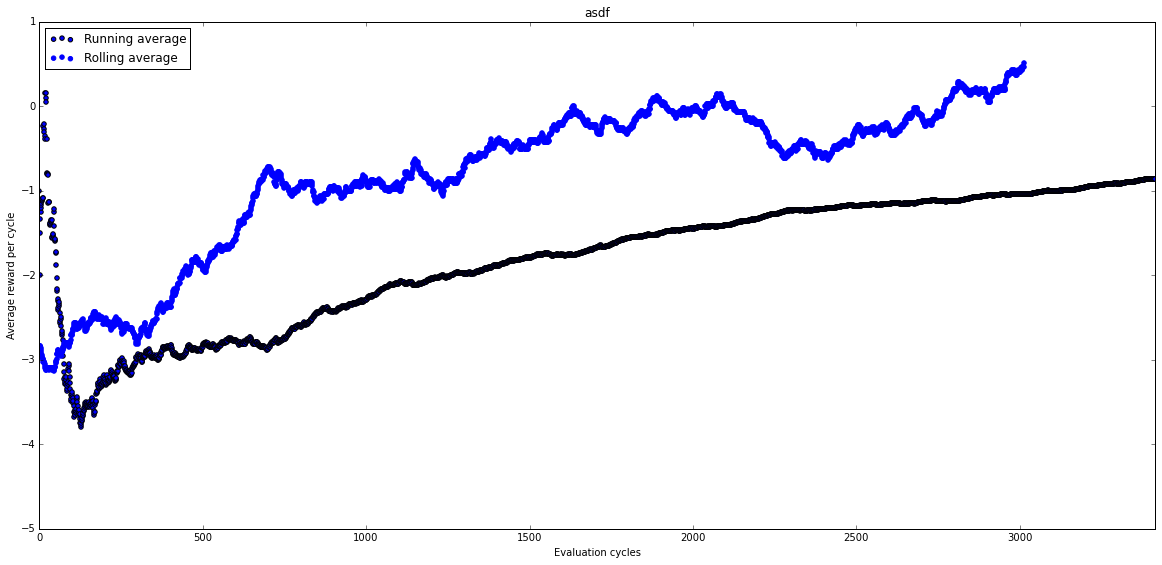

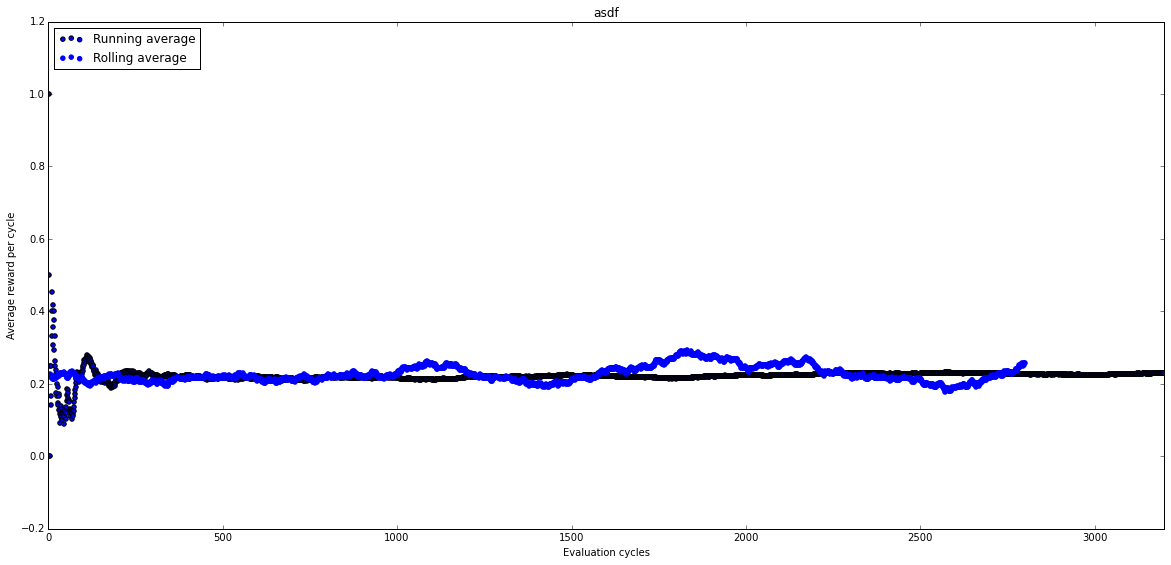

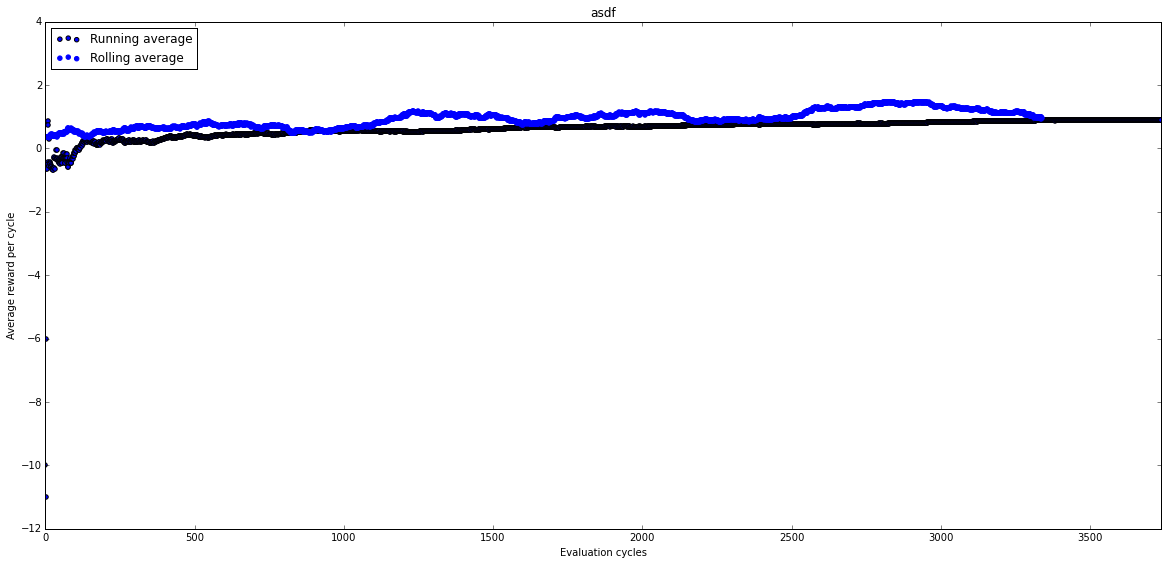

In [64]:
fil = 0
for game in ['cheesemaze','rockpaper','cheesemaze']:
    data = pd.read_csv('tmp'+str(fil)+'.csv',sep=', ',engine='python')
    dat = getEvaluationPhaseOnly(data)
    dat -= reward_offsets[game]
    plotRunningAndRollingAverage(dat,'asdf')
    fil+=1